<a href="https://colab.research.google.com/github/xx529/Project-Modeling/blob/master/%E5%A4%A9%E6%B1%A0%E8%92%B8%E6%B1%BD/%E8%92%B8%E6%B1%BD5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 项目说明

**项目名称**

工业蒸汽量预测

**赛题背景**

火力发电的基本原理是：燃料在燃烧时加热水生成蒸汽，蒸汽压力推动汽轮机旋转，然后汽轮机带动发电机旋转，产生电能。在这一系列的能量转化中，影响发电效率的核心是锅炉的燃烧效率，即燃料燃烧加热水产生高温高压蒸汽。锅炉的燃烧效率的影响因素很多，包括锅炉的可调参数，如燃烧给量，一二次风，引风，返料风，给水水量；以及锅炉的工况，比如锅炉床温、床压，炉膛温度、压力，过热器的温度等。

**赛题描述**

经脱敏后的锅炉传感器采集的数据（采集频率是分钟级别），根据锅炉的工况，预测产生的蒸汽量。

**数据说明**

1. 训练数据（train.txt）
2. 测试数据（test.txt）
3. 字段”V0”-“V37”，这38个字段是作为特征变量，”target”作为目标变量。
4. 排名结果依据预测结果的 MSE（mean square error）。

**结果提交**

选手需要提交测试数据的预测结果（txt格式，只有1列预测结果）。

**结果评估**

预测结果以mean square error作为评判标准。

**大赛网址**

https://tianchi.aliyun.com/competition/entrance/231693/introduction?spm=5176.12281925.0.0.5d777137xcPfn6

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks Project/Project Modeling/天池蒸汽/zhengqi_train.txt', sep='\t')
df_test_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks Project/Project Modeling/天池蒸汽/zhengqi_test.txt', sep='\t')

In [4]:
df_train_raw.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,-0.940,-0.307,-0.073,0.550,-0.484,0.000,-1.707,-1.162,-0.573,-0.991,0.610,-0.400,-0.063,0.356,0.800,-0.223,0.796,0.168,-0.450,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,0.188,-0.455,-0.134,1.109,-0.488,0.000,-0.977,-1.162,-0.571,-0.836,0.588,-0.802,-0.063,0.357,0.801,-0.144,1.057,0.338,0.671,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,0.874,-0.051,-0.072,0.767,-0.493,-0.212,-0.618,-0.897,-0.564,-0.558,0.576,-0.477,-0.063,0.355,0.961,-0.067,0.915,0.326,1.287,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,0.011,0.102,-0.014,0.769,-0.371,-0.162,-0.429,-0.897,-0.574,-0.564,0.272,-0.491,-0.063,0.352,1.435,0.113,0.898,0.277,1.298,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,-0.251,0.570,0.199,-0.349,-0.342,-0.138,-0.391,-0.897,-0.572,-0.394,0.106,0.309,-0.259,0.352,0.881,0.221,0.386,0.332,1.289,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


In [5]:
df_test_raw.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.368,0.380,-0.225,-0.049,0.379,0.092,0.550,0.551,0.244,0.904,-0.419,0.515,0.346,-0.114,-0.204,0.239,-0.089,0.961,0.247,0.899,-0.252,0.628,-0.063,0.098,-1.314,-0.662,-0.596,0.208,-0.449,0.047,0.057,-0.042,0.847,0.534,-0.009,-0.190,-0.567,0.388
1,0.148,0.489,-0.247,-0.049,0.122,-0.201,0.487,0.493,-0.127,0.904,-0.403,-0.324,0.465,0.653,0.148,-0.113,-0.093,0.961,0.073,1.168,-0.276,0.009,-0.063,0.090,-1.310,-0.646,-0.776,0.226,-0.443,0.047,0.560,0.176,0.551,0.046,-0.220,0.008,-0.294,0.104
2,-0.166,-0.062,-0.311,0.046,-0.055,0.063,0.485,0.493,-0.227,0.904,0.330,0.389,0.173,0.398,0.068,-0.192,-0.061,0.961,0.070,0.980,-0.340,0.270,-0.063,0.091,-1.310,-0.473,-0.607,0.084,-0.458,-0.398,0.101,0.199,0.634,0.017,-0.234,0.008,0.373,0.569
3,0.102,0.294,-0.259,0.051,-0.183,0.148,0.474,0.504,0.010,0.904,-0.431,0.524,-0.038,-0.340,-0.313,-0.590,-0.134,0.961,0.078,1.070,-0.292,0.726,0.133,0.086,0.234,-0.337,-0.986,0.203,-0.456,-0.398,1.007,0.137,1.042,-0.040,-0.290,0.008,-0.666,0.391
4,0.300,0.428,0.208,0.051,-0.033,0.116,0.408,0.497,0.155,0.904,-0.162,0.554,-0.063,0.611,-0.319,-0.927,-0.075,0.961,0.080,1.238,-0.150,0.141,0.133,0.089,0.237,-0.285,-0.669,0.227,-0.458,-0.776,0.291,0.370,0.181,-0.040,-0.290,0.008,-0.140,-0.497


In [6]:
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

In [7]:
df_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1925 non-null   float64
 1   V1      1925 non-null   float64
 2   V2      1925 non-null   float64
 3   V3      1925 non-null   float64
 4   V4      1925 non-null   float64
 5   V5      1925 non-null   float64
 6   V6      1925 non-null   float64
 7   V7      1925 non-null   float64
 8   V8      1925 non-null   float64
 9   V9      1925 non-null   float64
 10  V10     1925 non-null   float64
 11  V11     1925 non-null   float64
 12  V12     1925 non-null   float64
 13  V13     1925 non-null   float64
 14  V14     1925 non-null   float64
 15  V15     1925 non-null   float64
 16  V16     1925 non-null   float64
 17  V17     1925 non-null   float64
 18  V18     1925 non-null   float64
 19  V19     1925 non-null   float64
 20  V20     1925 non-null   float64
 21  V21     1925 non-null   float64
 22  

In [8]:
df_label = df_train_raw['target']
df_train_raw.drop('target', axis=1, inplace=True)

# EDA

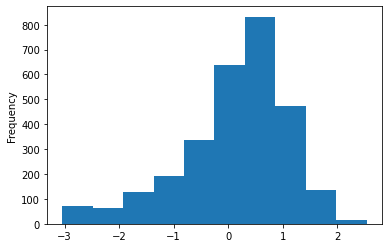

In [9]:
df_label.plot(kind='hist')
plt.show()

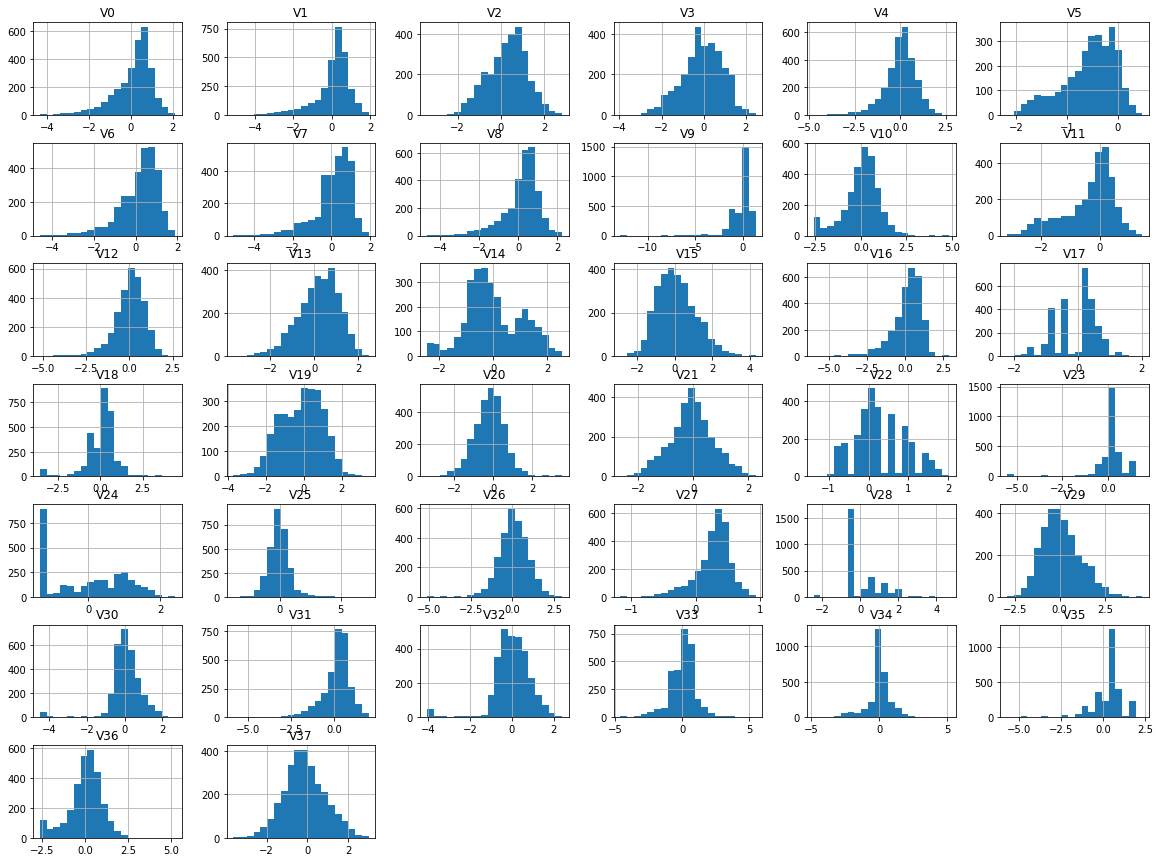

In [10]:
df_train_raw.hist(bins=20, figsize=(20, 15))
plt.show()

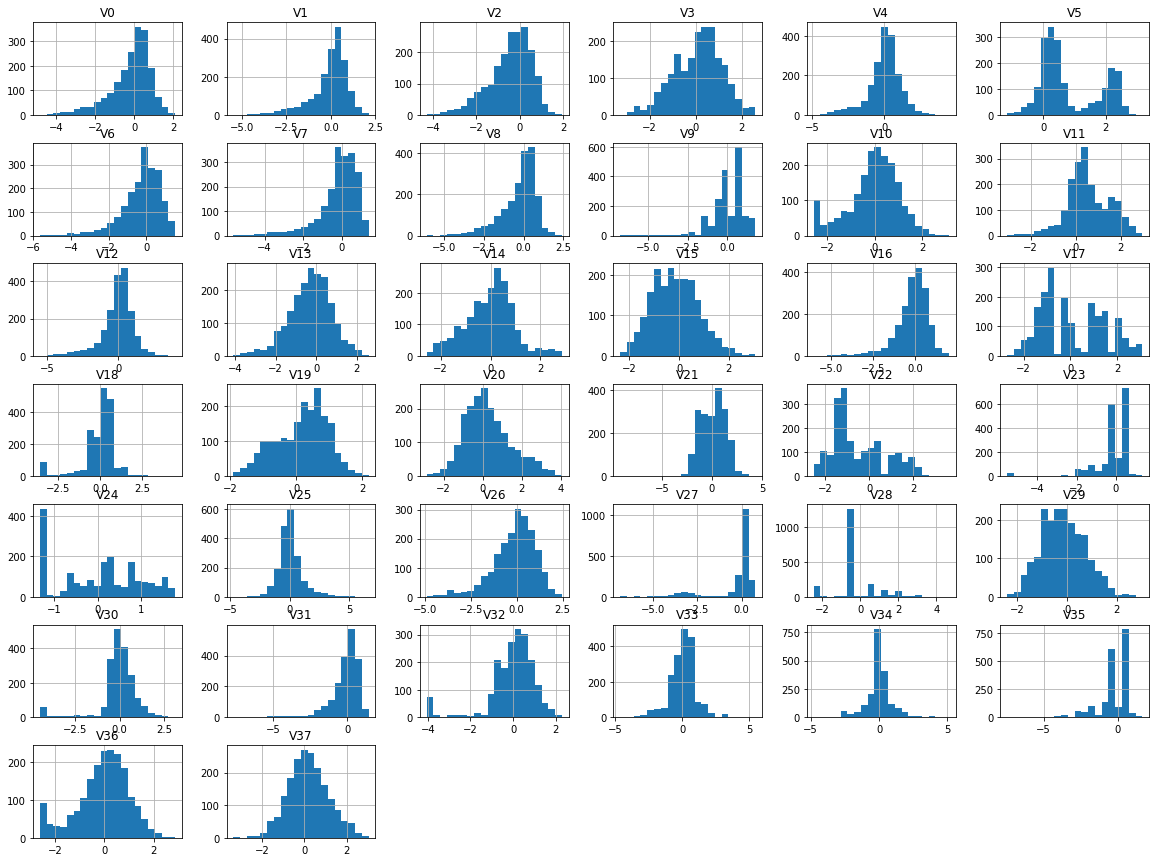

In [11]:
df_test_raw.hist(bins=20, figsize=(20, 15))
plt.show()

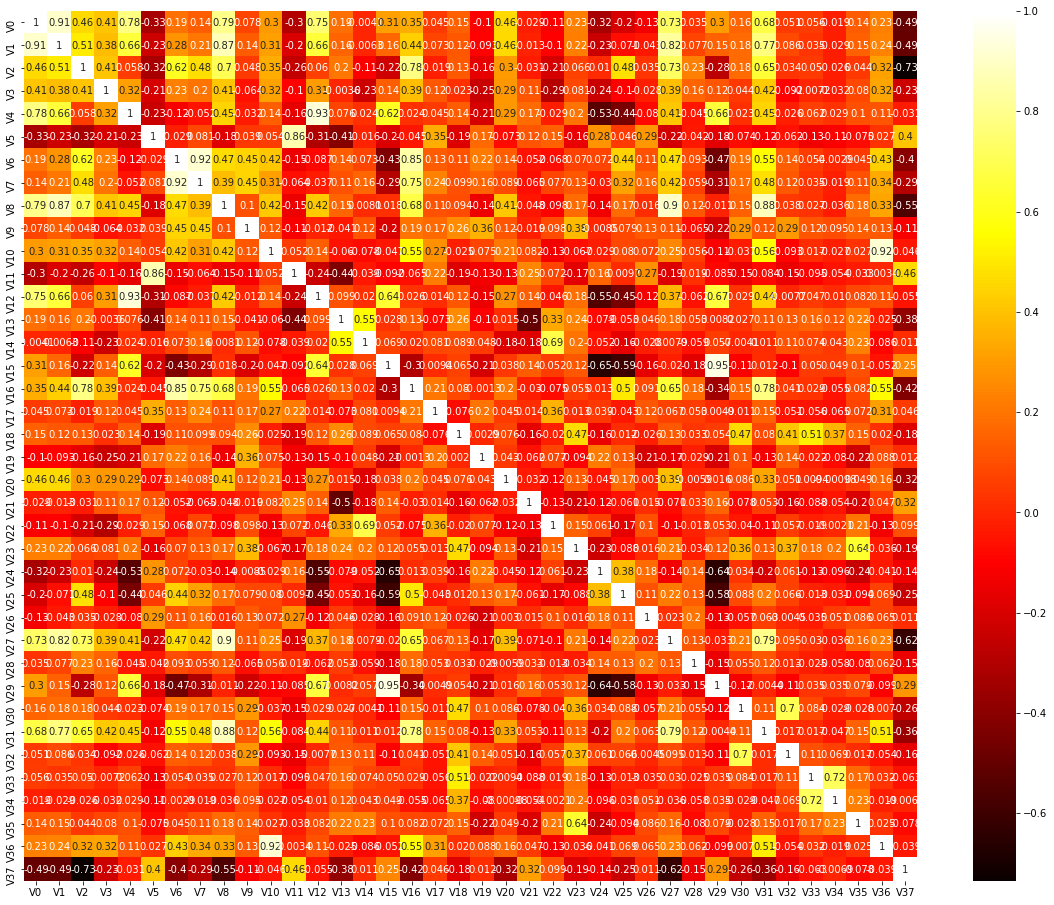

threshold over 0.7


['0.91 :V0  with  V1',
 '0.78 :V0  with  V4',
 '0.79 :V0  with  V8',
 '0.75 :V0  with  V12',
 '0.73 :V0  with  V27',
 '0.87 :V1  with  V8',
 '0.82 :V1  with  V27',
 '0.77 :V1  with  V31',
 '0.70 :V2  with  V8',
 '0.78 :V2  with  V16',
 '0.73 :V2  with  V27',
 '-0.73 :V2  with  V37',
 '0.93 :V4  with  V12',
 '0.86 :V5  with  V11',
 '0.92 :V6  with  V7',
 '0.85 :V6  with  V16',
 '0.75 :V7  with  V16',
 '0.90 :V8  with  V27',
 '0.88 :V8  with  V31',
 '0.92 :V10  with  V36',
 '0.95 :V15  with  V29',
 '0.78 :V16  with  V31',
 '0.79 :V27  with  V31',
 '0.72 :V33  with  V34']

In [12]:
plt.figure(figsize=(20, 16))
cross = df_train_raw.corr()
sns.heatmap(cross, cmap='hot', annot=True)
plt.show()

threshold = 0.7
over_threshold_pair = []
pair_result = np.where((cross.values < -threshold) | (cross.values > threshold))

for i, j in zip(pair_result[0], pair_result[1]):
    if i == j or (j, i) in over_threshold_pair:
        pass
    else:
        over_threshold_pair.append((i, j))

        
print('threshold over {}'.format(threshold))
columns_pair = ['{:.2f} :{}  with  {}'.format(cross.loc[cross.columns[x], cross.columns[y]], cross.columns[x], cross.columns[y]) for x, y in over_threshold_pair]
columns_pair

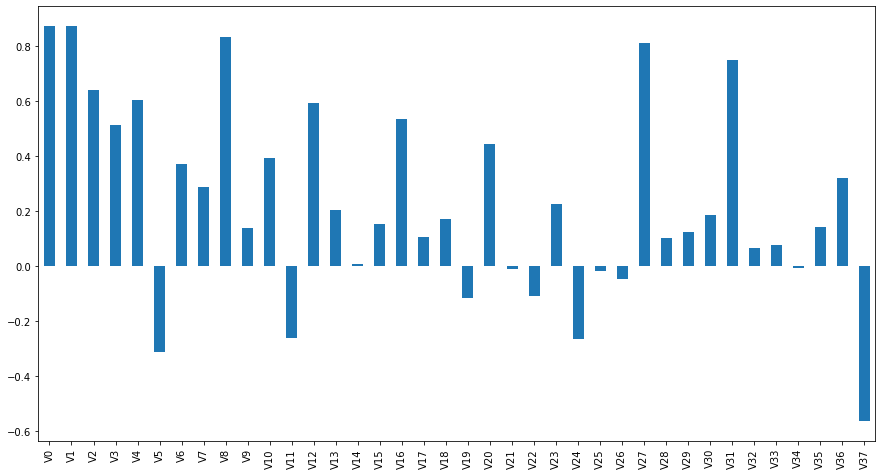

In [13]:
df_train_raw.corrwith(df_label).plot(kind='bar', figsize=(15, 8))
plt.show()

# Models Trainning

In [18]:
import lightgbm as lgb
from sklearn.model_selection import KFold

## LightGBM

score: 0.1397

In [15]:
lgb_train_data = lgb.Dataset(data=df_train_raw, label=df_label)

param = {
    'boosting': 'gbdt',
    'objective' :'regression',
    'learning_rate' : 0.01,
}

model = lgb.train(param, lgb_train_data, num_boost_round=3000, valid_sets=[lgb_train_data], verbose_eval=500)

[500]	training's l2: 0.0429196
[1000]	training's l2: 0.0193767
[1500]	training's l2: 0.0102937
[2000]	training's l2: 0.00574436
[2500]	training's l2: 0.00328104
[3000]	training's l2: 0.00192522


In [16]:
lgb_result = model.predict(df_test_raw)

In [105]:
k_fold_1 = list(KFold(n_splits=5, shuffle=True).split(df_train_raw))
len(set(k_fold_1[1][1]) & set(k_fold_1[4][1]))

0

# Stacking

In [199]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from collections import namedtuple

In [269]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from collections import namedtuple

class ModelStacking:
    def __init__(self):
        self.model_info_list = []
        self.ModelInfo = namedtuple('KFoldModel', ['name', 'models', 'val_fold_index'])
        self.train_model = LinearRegression()


    # 增加集成的 model 
    def add_model(self, name, models, k_fold):
        val_fold_index = [x[1] for x in k_fold]
        self.model_info_list.append(self.ModelInfo(name, models, val_fold_index))


    # 拟合模型（默认LR模型与参数）
    def fit(self, train_x, Y):
        self.creat_meta_features(train_x)
        self.train_model.fit(self.train_meta_features, Y)
        return self.train_model
    

    # 模型预测
    def predict(self, test_x):
        self.creat_predict_feature(test_x)
        result = self.train_model.predict(self.predict_meta_features)
        return resul


    # 获取所有 model 的训练用 new feature
    def creat_meta_features(self, train_x):
        df_new_feature_list = []

        for cls_model_info in self.model_info_list:
            df_new_feature = self.creat_train_new_feature(cls_model_info, train_x)
            df_new_feature_list.append(df_new_feature)
        
        self.train_meta_features = pd.concat(df_new_feature_list, axis=1)
        return self.train_meta_features


    # 创建一个 model 的训练用 new feature
    def creat_train_new_feature(self, cls_model_info, train_x):
        new_feature_array = np.zeros(shape=train_x.shape[0])

        for model, index in zip(cls_model_info.models, cls_model_info.val_fold_index):
            new_feature_predict = model.predict(train_x.iloc[index, :])
            new_feature_array[index] = new_feature_predict

        return pd.DataFrame(new_feature_array, columns=['train_' + cls_model_info.name])
    

    # 获取所有 model 的预测用 predict feature
    def creat_predict_feature(self, test_x):
        df_predict_feature_list = []

        for cls_model_info in self.model_info_list:
            df_predict_feature = self.creat_predict_new_feature(cls_model_info, test_x)
            df_predict_feature_list.append(df_predict_feature)

        self.predict_meta_features = pd.concat(df_predict_feature_list, axis=1)
        return self.predict_meta_features


    # 创建一个 model 的训练用 new feature
    def creat_predict_new_feature(self, cls_model_info, test_x):
        predict_feature_array = np.zeros(shape=test_x.shape[0])

        for model in cls_model_info.models:
            predict_feature_array += model.predict(test_x)

        predict_feature_array = predict_feature_array / len(cls_model_info.models)
        return pd.DataFrame(predict_feature_array, columns=['predict_' + cls_model_info.name])
    

    # 设置 stacking 训练用的模型，默认LR
    def set_train_model(self, train_model):
        self.train_model = train_model


# 快捷使用
stack = ModelStacking()
stack.add_model('lgb_1', [model]*5, k_fold_1)
stack.add_model('lgb_2', [model]*5, k_fold_2)
stack.fit(df_train_raw, df_label)
stack.predict(df_test_raw)

# 自定义模型
clssifier = LogisticRegression()
stack.set_train_model(clssifier)

# 仅获取 stack 训练和预测用的特征
stack = ModelStacking()
stack.add_model('lgb_1', [model]*5, k_fold_1)
train_meta_features = stack.creat_meta_features(df_train_raw)
predict_meta_features = stack.creat_predict_feature(df_test_raw)

array([ 0.4647235 ,  0.37938288,  0.14364139, ..., -2.53952536,
       -2.61523466, -2.59156058])

In [270]:
lgb_result

array([ 0.4618317 ,  0.37722041,  0.14349364, ..., -2.51674206,
       -2.59180433, -2.56833258])

In [255]:
stack.predict(df_test_raw)

stack.predict_meta_features

,predict_lgb_1,predict_lgb_2
0,0.461832,0.461832
1,0.377220,0.377220
2,0.143494,0.143494
3,0.289520,0.289520
4,0.458010,0.458010
...,...,...
1920,-1.738039,-1.738039
1921,-2.747717,-2.747717
1922,-2.516742,-2.516742
1923,-2.591804,-2.591804


In [216]:
df_test_raw.shape[0]

1925

In [217]:
s

aaa(dfdf=123, dfdfd=123)

In [39]:
s[0]

123

In [260]:
a = LinearRegression()

In [262]:
a.fit(df_train_raw, df_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [263]:
a.predict(df_test_raw)

array([ 0.26825457,  0.2600059 , -0.06905626, ..., -3.53171707,
       -3.48378753, -2.74290238])

In [ ]:
array([ 0.14412437,  0.65548466,  0.62984003, ..., -0.01613529,
        0.28461381,  0.4647235 ])